# Problem set 2 (35 + 55 + 15 + 28 = 133 pts)

## Problem 1 (LU decomposition) 35 pts


### 1. LU for band matrices (7 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– band matrices with the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively.

- (5 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with given diagonal values. 
For example, input parametres ```(diag_broadcast = [4,-2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
-2 & 1 & 0 & 0\\
4 & -2 & 1 & 0 \\
0 & 4 & -2 & 1 \\
0 & 0 & 4 & -2 \\
\end{pmatrix}.$$

As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...).
- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

__1.1__

In [1]:
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
from scipy.linalg import lu

# INPUT : diag_broadcast - list of diagonals value to broadcast,length equal to 3 or 5; n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal, where all ones;                  add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.

def band_lu(diag_broadcast, n):
    m = len(diag_broadcast)
    
    if m == 3:
        a, b, c = diag_broadcast
    
        L, U = np.zeros((1, n - 1)), np.zeros((n, 2))
        U[0, 0] = b
        U[:, 1] = c
        for k in range(1, n):
            L[0, k - 1] = a / U[k - 1, 0]
            U[k, 0] = b - c * L[0, k - 1]
        
    
    elif m == 5:
        a, b, c, d, e = diag_broadcast
        L, U = np.zeros((2, n - 1)), np.zeros((n, 3))
        
        U[0, 0], U[0, 1], U[0, 2] = c, d, e
        L[0, 0] = b / c
        
        U[1, 0] = c - U[0, 1] * L[0, 0]
        U[:-2, 2] = e
        
        for k in range(n - 2):
            L[1, k] = a / U[k, 0]
            L[0, k + 1] = (b - U[k, 1] * L[1, k]) / U[k + 1, 0]
            
            U[k + 1, 1] = d - L[0, k] * e
            U[k + 2, 0] = c - L[0, k + 1] * U[k + 1, 1] - L[1, k] * e
            U[k, 2] = e
    
    else:
        print('matrix not tridiagonal or pentadiagonal!')
    return L, U

Now let's check if the algorithm works correctly:

In [2]:
#For the case when m = 3:

diag_broadcast = [1, -2, 5]
n = 4
A = diags(diag_broadcast, [-1, 0, 1], shape=(n, n)).toarray()
print(A)

[[-2.  5.  0.  0.]
 [ 1. -2.  5.  0.]
 [ 0.  1. -2.  5.]
 [ 0.  0.  1. -2.]]


In [3]:
L, U = band_lu(diag_broadcast, n)

L = diags(L,[-1],shape=(n,n)).todense()+np.eye(n)
U = diags(U.T,[0,1],shape=(n,n)).todense()

In [4]:
print(L@U)

[[-2.  5.  0.  0.]
 [ 1. -2.  5.  0.]
 [ 0.  1. -2.  5.]
 [ 0.  0.  1. -2.]]


In [5]:
#For the case when m = 5:

diag_broadcast = [5, -4, 6, 2, 1]
n = 6
A = diags(diag_broadcast, [-2, -1, 0, 1, 2], shape=(n, n)).toarray()
print(A)

[[ 6.  2.  1.  0.  0.  0.]
 [-4.  6.  2.  1.  0.  0.]
 [ 5. -4.  6.  2.  1.  0.]
 [ 0.  5. -4.  6.  2.  1.]
 [ 0.  0.  5. -4.  6.  2.]
 [ 0.  0.  0.  5. -4.  6.]]


In [6]:
L, U = band_lu(diag_broadcast, n)

L = diags(L,[-1,-2],shape=(n,n)).todense()+np.eye(n)
U = diags(U.T,[0,1,2],shape=(n,n)).todense()

In [7]:
print(L@U)

[[ 6.  2.  1.  0.  0.  0.]
 [-4.  6.  2.  1.  0.  0.]
 [ 5. -4.  6.  2.  1.  0.]
 [ 0.  5. -4.  6.  2.  1.]
 [ 0.  0.  5. -4.  6.  2.]
 [ 0.  0.  0.  5. -4.  6.]]


As it can be seen the algorithm works correctly for both cases.

__1.2__ Now let's compare the running time of the algorithm with the build in function from scipy:

In [8]:
diag_broadcas  = [5, -4, 6, 2, 1]
n = 1000
A = diags(diag_broadcast, [-2, -1, 0, 1, 2], shape=(n, n)).toarray()

%timeit band_lu(diag_broadcast, n)
%timeit lu(A)

2.98 ms ± 33.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.34 times longer than the fastest. This could mean that an intermediate result is being cached.
83.6 ms ± 49.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


As it can be seen the build in function from scipy works much slower then my function. 

### 2. Stability of LU (8 pts)

Let
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$.
* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

__2.1__  __With pivoting:__

$$PA =\begin{pmatrix}
 0 & 1 & 0\\
 1 & 0 & 0 \\
 0 & 0 & 1
 \end{pmatrix} \begin{pmatrix}
    \varepsilon & 1 & 0\\
    1 & 1 & 1 \\
    0 & 1 & 1\\
    \end{pmatrix} = \begin{pmatrix}
       1 & 1 & 1 \\
       \varepsilon & 1 & 0\\
        0 & 1 & 1
        \end{pmatrix}$$ 
                        
$$
\left(\begin{array}{rrr|rrr}
1 & 1 & 1 & 1 & 0 & 0 \\
\varepsilon & 1 & 0 & 0 &  1 & 0  \\
0 & 1 & 1 & 1 & 0 & 1
\end{array}\right) \sim 
\left(\begin{array}{rrr|rrr}
1 & 1 & 1 & 1 & 0 & 0 \\
0 & 1-{\varepsilon} & -\varepsilon & \varepsilon &  1 & 0  \\
0 & 1 & 1 & 1 & 0 & 1
\end{array}\right) \sim 
\left(\begin{array}{rrr|rrr}
1 & 1 & 1 & 1 & 0 & 0 \\
0 & 1-{\varepsilon} & -\varepsilon & \varepsilon &  1 & 0  \\
0 & 0 & \frac{1}{1-\varepsilon} & 0 & \frac{1}{\varepsilon-1} & 1
\end{array}\right)
$$

The first obtained matrix is equal to $U$ and the second is equal to $L$.

Hence,
$$
PA = PLU = 
\begin{pmatrix}
1 & 0 & 0 \\
{\varepsilon} & 1 & 0 \\
0 & \frac{1}{1-\varepsilon} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 1 \\
0 & 1-{\varepsilon} &  -\varepsilon \\
0 & 0 & \frac{1}{1-\varepsilon}
\end{pmatrix}
$$

__Without pivoting:__
$$
\left(\begin{array}{rrr|rrr}
\varepsilon & 1 & 0 & 1 & 0 & 0 \\
1 & 1 & 1 & 0 &  1 & 0  \\
0 & 1 & 1 & 1 & 0 & 1
\end{array}\right) \sim 
\left(\begin{array}{rrr|rrr}
\varepsilon & 1 & 0 & 1 & 0 & 0 \\
0 & 1-\frac{1}{\varepsilon} & 1 & \frac{1}{\varepsilon} &  1 & 0  \\
0 & 1 & 1 & 1 & 0 & 1
\end{array}\right) \sim 
\left(\begin{array}{rrr|rrr}
\varepsilon & 1 & 0 & 1 & 0 & 0 \\
0 &\frac{\varepsilon - 1}{\varepsilon} & 1 & \frac{1}{\varepsilon} &  1 & 0  \\
0 & 0 & \frac{1}{1-\varepsilon} & 0 & \frac{\varepsilon}{\varepsilon-1} & 1
\end{array}\right)
$$

The first obtained matrix is equal to $U$ and the second is equal to $L$.

Hence,
$$
A = LU = 
\begin{pmatrix}
1 & 0 & 0 \\
\frac{1}{\varepsilon} & 1 & 0 \\
0 & \frac{\varepsilon}{1-\varepsilon} & 1
\end{pmatrix}
\begin{pmatrix}
\varepsilon & 1 & 0 \\
0 & \frac{\varepsilon -1}{\varepsilon} &  1 \\
0 & 0 & \frac{1}{1-\varepsilon}
\end{pmatrix}
$$

__2.2__ When we calculate $LU$ decomposition without pivoting and in case of $|\varepsilon|\ll 1$ we can get:

$$L \rightarrow \begin{pmatrix}
    1 & 0 & 0\\
    \infty & 1 & 0 \\
    0 & 0 & 1
    \end{pmatrix} $$
and 
$$U \rightarrow \begin{pmatrix} 0 & 1 & 0\\ 0 & -\infty& 1 \\ 0 & 0 & 0 \end{pmatrix}$$

Computer memory cannot store too small numbers (all digits of these numbers), that is why the resulting matrices might significantly differ from the true one or even computer might not be able to compute the resulting matrices due to errors (because of dividing by zero). To avoid such failures we can use permutation matrix.

### 3. Block LU (10 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

__3.1__ To find matrix $S$ (Schur complement) we should multiply both sides of our equation by matrix $\begin{bmatrix} I & 0 \\ -A_{21}A_{11}^{-1} & I \end{bmatrix}$ :

$$
\begin{bmatrix} I & 0 \\ -A_{21}A_{11}^{-1} & I \end{bmatrix} 
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} I & 0 \\ -A_{21}A_{11}^{-1} & I \end{bmatrix} \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}
$$

$$
\begin{bmatrix} A_{11} & A_{12} \\ 0 & -A_{21}A_{11}^{-1}A_{12} + A_{22} \end{bmatrix}
    \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ -A_{21}A_{11}^{-1}f_1 +f_2 \end{bmatrix}$$
    
Hence, the required matrix $S = -A_{21}A_{11}^{-1}A_{12} + A_{22}$ and $\hat{f_2} = -A_{21}A_{11}^{-1}f_1 +f_2$.

__3.2__ From the previous subproblem we can state that:

$$
\begin{bmatrix} I & 0 \\ -A_{21}A_{11}^{-1} & I \end{bmatrix} 
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} =
     \begin{bmatrix} A_{11} & A_{12} \\ 0 & -A_{21}A_{11}^{-1}A_{12} + A_{22} \end{bmatrix}
$$

And

$$
\begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} = 
\begin{bmatrix} I & 0 \\ -A_{11}A_{21}^{-1} & I \end{bmatrix} 
\begin{bmatrix} A_{11} & A_{12} \\ 0 & -A_{21}A_{11}^{-1}A_{12} + A_{22} \end{bmatrix}
$$

Also:

$$
det(A) = det(A_{11}A_{22} - A_{12}A_{21}) = det(A_{11})det(-A_{21}A_{11}^{-1}A_{12}+A_{22})
$$

Now if we take 
$$
A_{11}=X, ~ A_{12}=-A,~A_{21}=B,~A_{22} = I
$$

Then
$$ \det(X+AB) = \det(X)\det(I+BX^{-1}A) $$

__3.3__ From the previous subproblem:
$$
det(A) = det(A_{11}A_{22} - A_{12}A_{21}) = det(A_{11})det(-A_{21}A_{11}^{-1}A_{12}+A_{22})
$$

Now if we take: $$A_{11}=I, ~ A_{12}=F,~A_{21}=G,~A_{22} = I$$

Then $$\det(I_m - FG) = \det(I_n - GF).$$

### 4. Efficient implementation of LU decomposition (10 pts)

In the lecture we provide naive implementation of LU factorization with loops and elementwise update of factors. In this subproblem we ask you to provide more efficient implementation of LU factorization and explain how you derive this implementation (main ideas and how you use them in this particular case). 
- (1 pts) Main idea for speed up computation of LU factorization (without using built-in function!) 
- (4 pts) Implement the presented approach to speed up LU 
- (1 pts) Illustrate numerically that your implementation is correct
- (2 pts) Provide the comparison of running time of naive implementation from the lecture, your implementation and NumPy built-in function for range of matrix dimensions. We expect you plot the running time vs matrix dimension for these implementations. So you should get the plot with three lines.
- (2 pts) Discuss the obtained results and explain what other tricks are possible to accelerate computing the LU factorization. 

NumPy or JAX are both ok in this subproblem, but please use the single library for all implementations. 

__4.1__ Here I decided to implement Doolittle Algorithm for LU decomposition(https://www.geeksforgeeks.org/doolittle-algorithm-lu-decomposition/). 

Upper ($U$) and Lower ($L$) triangular matrices are calculated as follows (from matrix $A$):

$\forall j \\
i=0 \rightarrow U_{i j}=A_{i j} \\
i>0 \rightarrow U_{i j}=A_{i j}-\sum_{k=0}^{i-1} L_{i k} U_{k j} $


$\forall i \\
j=0 \rightarrow L_{i j}=\frac{A_{i j}}{U_{j j}} \\
j>0 \rightarrow L_{i j}=\frac{A_{i j}-\sum_{k=0}^{j-1} L_{i k} U_{k j}}{U_{j j}}$

It should be noted that in this algorithm we do perform Gaussian Elimination procedure.

__4.2__

In [9]:
def LU_Doolittle(A):
    
    N = A.shape[0]
    
    L = np.eye(N, dtype = np.float)
    U = np.zeros((N,N), dtype = np.float)
    
    
    for i in range(N):
        U[i,i:] = A[i,i:] - np.dot(L[i,:i],U[:i,i:])
        val1 = np.dot(L[(i+1):,:],U[:,i])
        val2 = A[(i+1):,i] - val1
        L[(i+1):,i] = val2/U[i,i]
        
    return L,U

__4.3__ Let's illustrate the correctness of this algorithm (compare the resulting matrix with the true one):

In [10]:
for i in range(2, 7):
    A = np.random.randint(100,size = (i,i))
    L,U = LU_Doolittle(A)
    res = np.dot(L,U) - A
    print(res.round(10))

[[0. 0.]
 [0. 0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -0.]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -0. -0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0. -0.  0.]
 [ 0.  0.  0. -0.  0. -0.]]


As it can be seen the algorithm works correctly for matrices of different dimentions.

__4.4__

In [11]:
#naive version of the LU decomposition from the lecture:

def LU(a):
    n = a.shape[0]
    L = np.zeros((n, n), dtype = np.double)
    U = np.zeros((n, n), dtype = np.double)
    for k in range(n): #Eliminate one row   
        L[k,k] = 1 
        for i in range(k+1, n):
            L[i,k] =  a[i, k] / a[k, k]
            for j in range(k+1, n):
                a[i, j] = -L[i, k] * a[k, j]
            for j in range(k, n):
                U[k, j] =  a[k, j]
    return L,U

In [12]:
sci = []
naive = []
new_lu = []

dim = [10,50,100,200, 300,400, 500]

from scipy import linalg

for n in dim:
    A = np.random.random(size = (n,n))
    
    func1_time = %timeit -o -q LU(A)
    naive.append(np.mean(func1_time.all_runs))
    
    func1_time = %timeit -o -q LU_Doolittle(A)
    new_lu.append(np.mean(func1_time.all_runs))

    func1_time = %timeit -o -q linalg.lu(A, permute_l=False)
    sci.append(np.mean(func1_time.all_runs))

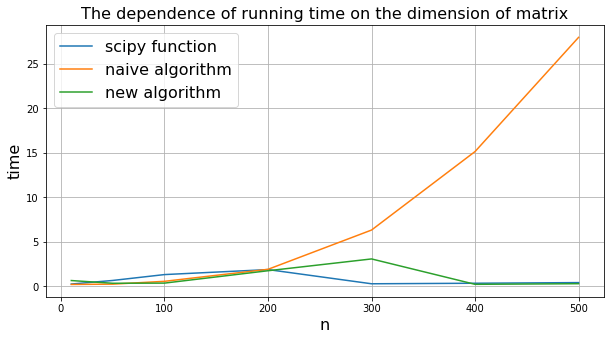

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(dim,sci,label='scipy function')
plt.plot(dim,naive,label='naive algorithm')
plt.plot(dim,new_lu,label='new algorithm')
plt.title(r'The dependence of running time on the dimension of matrix', fontsize=16)
plt.ylabel(r"time", fontsize=16)
plt.xlabel(r"n", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

__4.5__  On the graph below we can see that new implementation of LU factorization works much faster then naive implementation of LU factorization. The time of realization is comparable with buil-in scipy function. 

The performance of the algorithm may be accelerated by the use of block approach. 

## Problem 2 (eigenvalues)  55 pts

### 1. Theoretical tasks (10 pts)

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

__1.1(a)__ 
- Firstly, let's prove that if matrix is Hermitian then eigenvalues are real: 


For Hermitian matrices: $A = A^*$


Also $Ax = \lambda x$, where $\lambda$ is an eigenvalue of $A$

$$\lambda(x,x)=(\lambda x,x) = (Ax,x) = (x,A^*x)=(x,Ax)=(x,\lambda x)=(\lambda ^* x, x)= \lambda ^* (x,x) $$

We get that $\lambda = \lambda ^*$


Hence, if matrix is Hermitian then eigenvalues are real.

- Now let's prove that matrix is Hermitian if eigenvalues are real:


$\lambda \in R$ and also we know that $A$ is normal, hence, it is diagonalizable: there exist unitary matrix $U$ such that $A = U\Lambda U^*$, where $\Lambda$ is diagonal (with eigenvalues on the diagonal).

Conjugate transpose: $$A^* = (U\Lambda U^*)^* = U(\Lambda)^* U^* = U\Lambda U^* = A$$

As we can see, due to the fact that eigenvalues are real and matrix $A$ is normal, $A$ is Hermitian.


__1.1(b)__

- Firstly, let's prove that if $A$ is normal and $|\lambda|=1$ (hence, $\Lambda \Lambda^* = \Lambda^* \Lambda= I$) then $A$ is unitary.



Due to the fact that $A$ is normal:
$$A = U\Lambda U^*$$

$U$ is unitary: $$UU^*=U^*U=I$$

$$AA^*= U\Lambda U^* (U\Lambda U^*)^* = U\Lambda U^* U\Lambda^* U^* = I$$

$$A^*A = (U\Lambda U^*)^* U\Lambda U^* =  U\Lambda^* U^* U\Lambda U^* = I$$

Hence, $AA^* = A^*A = I$ and $A$ is unitary.

- Now let's prove that if $A$ is unitary ($AA^* = A^*A = I$) and normal then $|\lambda|=1$:

$$Ax=\lambda x$$

$$A^*x = \lambda ^* x$$

$$1\cdot x = Ix = AA^*x = A\lambda ^* x = \lambda ^* Ax = \lambda ^* \lambda x$$

$$1 = \lambda ^* \lambda$$

Hence, $|\lambda|=1$.

__1.2__

Сharacteristic polynomial of the perturbed Jordan block:

$$(\lambda - \hat{\lambda}) ^n + (-1)^{n-1}\varepsilon = 0$$

$$(\lambda - \hat{\lambda}) ^n = (-1)^{n} \varepsilon$$

If $n$ is even: 
$$ \hat{\lambda} = \lambda - \sqrt[n]{\varepsilon}$$

If $n$ is odd:
$$ \hat{\lambda} = \lambda - \sqrt[n]{-\varepsilon} =  \lambda \pm i\sqrt[n]{\varepsilon} $$

Now if we make: $n \rightarrow \infty , ~ \varepsilon \rightarrow 0$, then $ \hat{\lambda} = \lambda$ or $ \hat{\lambda} = \lambda - 1 ~( \hat{\lambda} = \lambda - i)$. 

However, for $J(0)$ the matrix becomes upper triangular and all eigenvalues of it are equal to $\lambda$ (without dependance on $n$). 

Hence, The Jordan form is unstable due to these perturbations.

### 2. PageRank (35 pts)


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

__2.1__

In [14]:
import scipy as sc 

### MY 
# INPUT:  G - np.ndarray
# OUTPUT: A - np.ndarray (of size G.shape)
def pagerank_matrix(G): # 5 pts
    
    A = G.astype(float)
    
    if sc.sparse.issparse(A):
        sums = np.array(np.sum(A.T,axis=1)).ravel()
        sums = [1./elem if elem != 0 else 1 for elem in sums]
        return A@diags(sums, 0)
    else: 
        sums = np.array(np.sum(A,axis=0))
        for col in range(A.shape[0]):
            index_nnz = np.nonzero(A[:,col])[0]
            if sums[col]:
                A[index_nnz, col] = 1.0/sums[col]
    return A

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

__2.2__

In [15]:
G = np.array([[0, 0, 1, 0, 0], [1, 0, 1, 0, 0],[0, 1, 0, 0, 0],[0, 0, 0, 0, 1],[0, 0, 0, 1, 0]])
A = pagerank_matrix(G)
print(A)

[[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0. ]]


In [16]:
eig = np.linalg.eigvals(A)
print(eig)

[-0.5+0.5j -0.5-0.5j  1. +0.j   1. +0.j  -1. +0.j ]


As it can be seen, the largest eigenvalue of $A$ is equal to 1. Its multiplicity is 2.

__2.3__

In [17]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter,with_l=False): 
    x = x0   
    res = np.zeros(num_iter + 1) 
    
    if with_l:
        lambdas = np.zeros(num_iter + 1) 
        
    for i in range(num_iter+1):
        x = A@x
        x = x/np.linalg.norm(x,2)        
        l = (A@x).T@x
        res[i] = np.linalg.norm(A@x - l*x ,2)
        if with_l:
            lambdas[i] = l
    if with_l:
        return x, l, res, lambdas 
        
    return x, l, res

# with_l=True - if we want to save all the eigenvalues (at every step)

In [18]:
#for matrix A:

x0 = np.random.rand(A.shape[0])
x, l, res = power_method(A, x0, 50)
print('x =',x)
print('l = ', l)
print('res = ', res)

x = [0.17426679 0.34853356 0.34853354 0.52368572 0.67263147]
l =  0.9778151661868295
res =  [0.72699429 0.62907168 0.48400407 0.28715196 0.29873277 0.28359902
 0.23328316 0.21839394 0.21569555 0.21410584 0.21210359 0.20942006
 0.20998706 0.20994899 0.20938979 0.20961893 0.20947176 0.20945357
 0.20952568 0.20944084 0.20947727 0.20948008 0.20945782 0.20947731
 0.20946818 0.20946737 0.20947267 0.20946769 0.20946997 0.20947016
 0.20946882 0.20947006 0.20946949 0.20946944 0.20946978 0.20946947
 0.20946961 0.20946962 0.20946954 0.20946961 0.20946958 0.20946958
 0.2094696  0.20946958 0.20946959 0.20946959 0.20946958 0.20946959
 0.20946958 0.20946958 0.20946959]


In [19]:
C = np.array([[2, -1], [-1, 2]])
x0 = np.array([-1, 0])
num_iter = 50

_, l, _ = power_method(C, x0, num_iter)
print(l)

3.0000000000000004


As it can be seen the method works correctly, according to it the largest eigenvalue is equal to 3 (as we expected).

* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

__2.4__

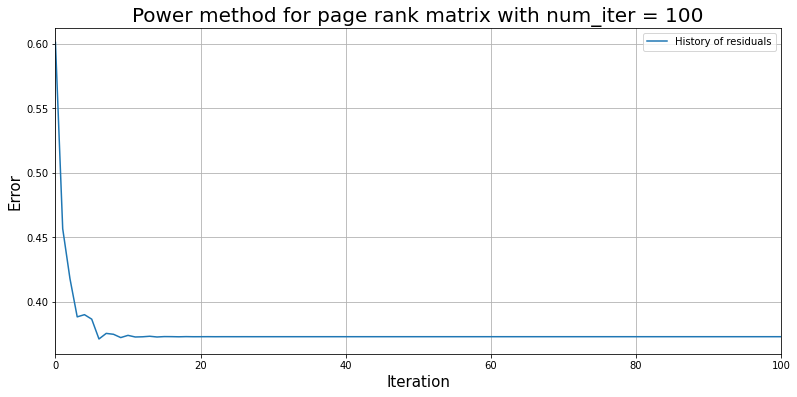

In [20]:
import matplotlib.pyplot as plt

x0 = np.random.rand(A.shape[0])

x, l, res, lambdas = power_method(A, x0, 100, with_l=True)

plt.figure(figsize=(13,6))
plt.plot(res, label = 'History of residuals')
plt.title('Power method for page rank matrix with num_iter = 100',fontsize=20)
plt.ylabel('Error',fontsize=15)
plt.xlabel('Iteration',fontsize=15)
plt.legend()
plt.xlim(0,100)
plt.grid('true')
plt.show()

Let's calculate the convergence ratio for our matrix (it should be less then 1):

In [21]:
lambdas[1]/lambdas[0],np.abs(lambdas[1]/lambdas[0])<1

(0.9932845953060123, True)

The Power method does not converge due to that fact.

__2.5__

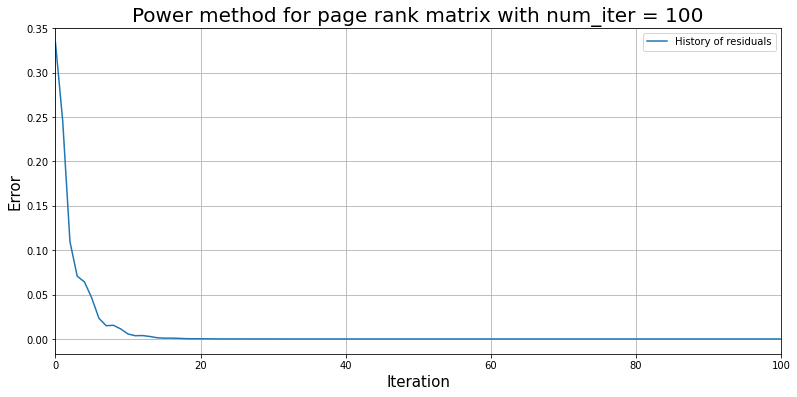

In [22]:
# for the graph with self-loop

G_new = G.copy()
G_new[4,4] = 1
A_new = pagerank_matrix(G_new)

x0 = np.random.rand(A_new.shape[0])

x, l, res, lambdas = power_method(A_new, x0, 100, with_l=True)

plt.figure(figsize=(13,6))
plt.plot(res, label = 'History of residuals')
plt.title('Power method for page rank matrix with num_iter = 100',fontsize=20)
plt.ylabel('Error',fontsize=15)
plt.xlabel('Iteration',fontsize=15)
plt.legend()
plt.xlim(0,100)
plt.grid('true')
plt.show()

Now, as we can see, the algorithm provides the convergence of the residuals.

In [23]:
eig_vecs = []
for _ in range(10):
    x0 = np.random.rand(A_new.shape[0])
    x, _, _ = power_method(A_new, x0, 100)
    eig_vecs.append(x)
for i in range(10):
    print(f'Eigenvector for {i} guess = {eig_vecs[i]}')

Eigenvector for 0 guess = [0.27030058 0.54060116 0.54060116 0.2617015  0.523403  ]
Eigenvector for 1 guess = [0.20640409 0.41280819 0.41280819 0.35116268 0.70232537]
Eigenvector for 2 guess = [0.26380561 0.52761122 0.52761122 0.27337133 0.54674265]
Eigenvector for 3 guess = [0.24075852 0.48151703 0.48151703 0.30929534 0.61859068]
Eigenvector for 4 guess = [0.28175335 0.56350669 0.56350669 0.2389709  0.47794181]
Eigenvector for 5 guess = [0.31344624 0.62689249 0.62689249 0.15215983 0.30431966]
Eigenvector for 6 guess = [0.27141015 0.5428203  0.5428203  0.25962619 0.51925237]
Eigenvector for 7 guess = [0.26329294 0.52658587 0.52658587 0.27425954 0.54851907]
Eigenvector for 8 guess = [0.0538159  0.1076318  0.1076318  0.44134672 0.88269344]
Eigenvector for 9 guess = [0.32849686 0.65699371 0.65699371 0.07590564 0.15181129]


As we can see the eigenvectors depend on the initial guess.

__2.6__

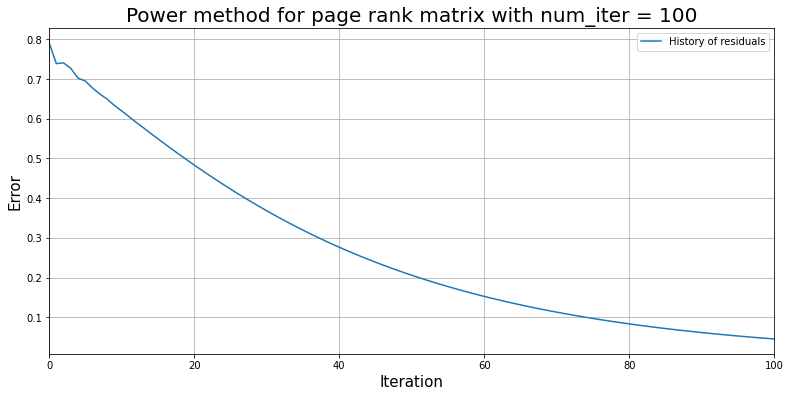

In [24]:
d = 0.97
Ad = d*A + (1-d)/A.shape[0]*np.ones(A.shape)
x0 = np.random.rand(A.shape[0])
x, l, res = power_method(Ad, x0, 100)

plt.figure(figsize=(13,6))
plt.plot(res, label = 'History of residuals')
plt.title('Power method for page rank matrix with num_iter = 100',fontsize=20)
plt.ylabel('Error',fontsize=15)
plt.xlabel('Iteration',fontsize=15)
plt.legend()
plt.xlim(0,100)
plt.grid('true')
plt.show()

__2.7__

In [25]:
print(np.abs(np.linalg.eigvals(Ad)))

[0.68589358 0.68589358 1.         0.97       0.97      ]


As we can see, the second largest in the absolute value eigenvalue is equal to 0.97. 

$|\lambda_{2(d)}| = |\lambda_2| d$

Therefore, the convergence rate of the algorithm is equal to $\frac{|\lambda_{2(d)}|}{|\lambda_1|} = d \frac{|\lambda_{2}|}{|\lambda_1|} = 0.97$.

__2.8__

In [26]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)

#partially from lecture 9

def pagerank_matvec(A, d, x): 
    A = A.astype(float)
    if sc.sparse.issparse(A):
        ia = A.indptr
        ja = A.indices
        sa = A.data
        
        y = np.zeros_like(x)
        
        for i in range(A.shape[0]):
            for k in range(ia[i],ia[i+1]):
                y[i] += sa[k] * x[ja[k]]

        y = d*y+(1-d)/A.shape[0] * np.sum(x)

    else:
        Ad = d*A + (1-d)/A.shape[0]*np.ones(A.shape)
        y = Ad@x
    return y

__2.9__

In [27]:
n = 100
N = 10000
d = 0.97
index = np.arange(N)
values = np.random.rand(n)
rows = np.random.choice(index, n)
columns = np.random.choice(index, n)

rand_adj_csr = sc.sparse.csr_matrix((values, (rows, columns)), shape = (N,N))
rand_adj = rand_adj_csr.todense()
x0 = np.random.rand(N)

In [28]:
%timeit pagerank_matvec(rand_adj_csr, d, x0)
%timeit pagerank_matvec(rand_adj, d, x0)

sparse_mv = pagerank_matvec(rand_adj_csr, d, x0)
mv = pagerank_matvec(rand_adj, d, x0)

print('Is close?',np.isclose(sparse_mv, mv).all())

4.12 ms ± 61.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.15 s ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Is close? True


As we can see the solutions are close to each other. The direct evaluation works much slower then pagerank_matvec function.

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

__2.10__

In [29]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [30]:
print(f'Density {len(G.data)/np.prod(G.shape):.1e}')

Density 4.5e-05


In [31]:
top = 10
top_items = np.array(np.argsort(np.sum(G,axis=0)))[0][-top:]
for num, author in enumerate(reversed(authors[top_items])):
    print(num+1,author)

1 Scott Shenker
2 Andrew Zisserman
3 Hari Balakrishnan
4 Jiawei Han
5 Anil K. Jain
6 Cordelia Schmid
7 Jitendra Malik
8 Ion Stoica
9 David E. Culler
10 David G. Lowe


In [32]:
G[np.nonzero(G)] = 1 

In [33]:
A_auth = pagerank_matrix(G)

In [34]:
sums = np.array(np.sum(A_auth, axis=0))[0]
non_zero = np.nonzero(sums)
np.isclose(sums[non_zero],1).all(),np.isclose(sums[non_zero],1).any()

(True, True)

As we can see the matrix is stochastic.

__2.11__

In [35]:
from scipy.sparse.linalg import LinearOperator

In [36]:
d = 0.85
L = LinearOperator(A_auth.shape, matvec=lambda x, A=A_auth, d=d: pagerank_matvec(A, d, x))

__2.12__

In [37]:
x0 = np.random.rand(A_auth.shape[0])
x, l, res = power_method(L, x0, 10)

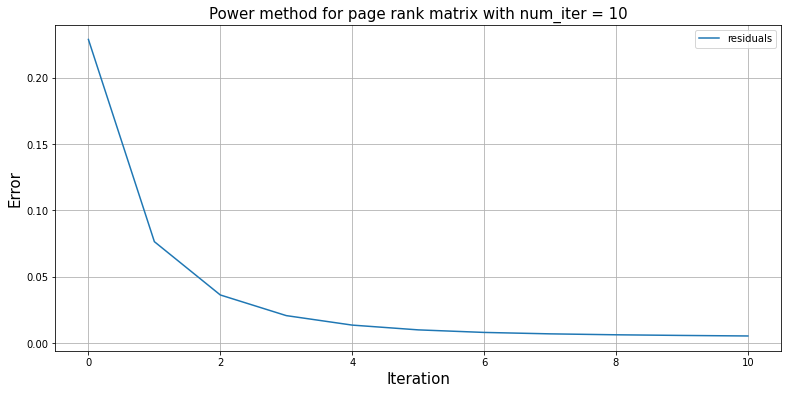

In [38]:
plt.figure(figsize=(13,6))
plt.plot(res, label = 'residuals')
plt.title('Power method for page rank matrix with num_iter = 10',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.xlabel('Iteration',fontsize=15)
plt.legend()
plt.grid()
plt.show()

__2.13__

In [39]:
top = 10
top_items = np.array(np.argsort(x))[-top:]
for num, author in enumerate(reversed(authors[top_items])):
    print(num+1,author)

1 Wei Wang
2 Yang Liu
3 Wei Zhang
4 Wei Li
5 Lei Wang
6 Athanasios V. Vasilakos
7 Lei Zhang
8 Jun Zhang
9 Jun Wang
10 Li Li


### 3. QR algorithm (10 pts)

* Implement QR-algorithm without shifting. Prototype of the function is given below

__3.1__

In [40]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    Ak = A_init
    convergence = np.zeros(num_iter+1)
    for i in range(num_iter+1):
        Q,R = sc.linalg.qr(Ak)
        Ak = R @ Q
        tril = np.tril(Ak,k=-1)
        convergence[i] = np.linalg.norm(tril, ord=np.inf)
    return Ak, convergence

#### Symmetric case (3 pts)
- Create symmetric tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops.
- Run $400$ iterations of the QR algorithm for this matrix.
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

__3.2__

In [41]:
n = 11
symm_mat = diags([-1,2,-1], [-1,0,1],shape=(n,n)).toarray()
Ak, convergence = qr_algorithm(symm_mat, 400)

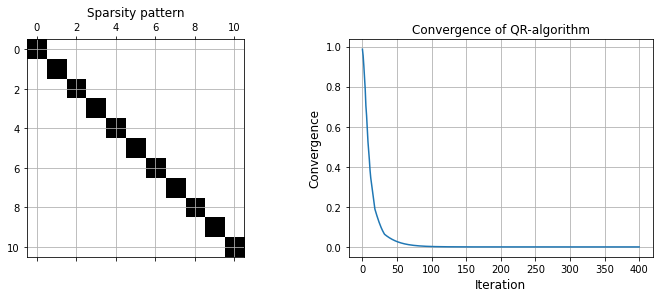

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.spy(Ak, precision=1e-7)
plt.title('Sparsity pattern',fontsize=12)
plt.grid()
plt.subplot(122)
plt.plot(convergence)
plt.title('Convergence of QR-algorithm',fontsize=12)
plt.ylabel('Convergence',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.grid()
plt.show()

#### Nonsymmetric case (4 pts)

- Create nonsymmetric tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops.
- Run $250$ iterations of the QR algorithm for this matrix.
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

__3.3__

In [43]:
nonsymm_mat = diags([5,3,-2], [-1,0,1],shape=(n,n)).toarray()
Ak, convergence = qr_algorithm(nonsymm_mat, 250)

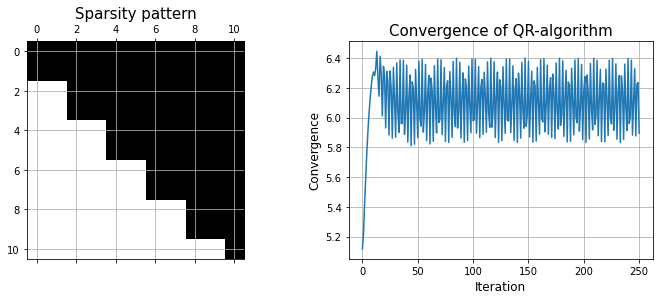

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.spy(Ak, precision=1e-7)
plt.title('Sparsity pattern',fontsize=15)
plt.grid()
plt.subplot(122)
plt.plot(convergence)
plt.title('Convergence of QR-algorithm',fontsize=15)
plt.ylabel('Convergence',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.grid()
plt.show()

The matrix is not lower triangular.

Let's have a look at the eigenvalues of the matrix:

In [45]:
print(np.abs(np.linalg.eigvals(Ak)))

[6.80591714 6.80591714 6.244998   6.244998   5.38516481 5.38516481
 4.35889894 4.35889894 3.41752717 3.41752717 3.        ]


As we can see $|\lambda_1| = |\lambda_2|$. Therefore, there is no convergence in non-symmetric case.

## Problem 3. (Pseudo-Schur decomposition) 15 pts
Let's redefine scalar product $ \forall x, y \in \mathbb{C}^n$ in a following way:

$$ [x,y]_J = y^{*}Jx, \text{s.t.}\ J = \text{diag}(j_{11}, j_{22}, \dots, j_{nn})\ \text{and}\ j_{ii} = \pm1\ \forall i \in [1,n].$$

Denote rows of matrix $V \in \mathbb{C}^{n \times n}$ as $v_1, v_2, \dots, v_n$. Then $V$ is called $\textbf{J-orthonormal}$ iff 

$$[v_i, v_k]_J = \pm \delta_{ik}.$$

We will call matrix $T \in \mathbb{C}^{n \times n}$ $\textbf{almost triangular}$ iff $T$ is upper triangular with diagonal blocks of order $1$ or $2$.

Matrix $A \in \mathbb{C}^{n \times n}$ is said to be $\textbf{J-decomposable}$ if exist J-orthonormal matrix $V$ and upper triangular matrix $T$ such that 


$$A = V T V^{-1}.$$

Matrix $A \in \mathbb{C}^{n \times n}$ is said to have $\textbf{pseudoschur J-decomposition}$ if exist J-orthonormal matrix $V$ and almost triangular matrix $T$ such that


$$A = V T V^{-1}.$$

This problem is to get familiar with the fact that two abovementioned decompositions exist not for any square matrix with complex entries.




- (2 pts) $A$ has pseudoschur J-decomposition $A = V T V^{-1}, \ \text{where}\ V = \begin{bmatrix} v_1 & v_2 &  \ldots & v_n \end{bmatrix}, \ T = \begin{bmatrix} T_{ij} \end{bmatrix}$ and $v_1$ is $\textbf{not}$ an eigenvector of $A$. Show that $T_{21} \ne 0$. 



- (5 pts) Given $J = \text{diag}(1, -1)$ and $A = \begin{bmatrix}
3   \ -1\\
-1\   \ 3\\
\end{bmatrix}$, prove that $A$ is not J-decomposable.


- (8 pts) Given that $A \in \mathbb{C}^{n \times n}$ is diagonalizable, show that it has pseudoschur J-decomposition for any $J$ of form $J=\text{diag}(\pm 1, \dots, \pm 1)$.
Note that in order to solve that subproblem you should firstly prove the following fact:

    Let $S \in \mathbb{C}^{m \times n},\ m \ge n,\ J = \text{diag}(\pm 1).$ If $A = S^{*}JS$ and $det(A) \ne 0$, then exists QR decomposition of $S$ with respect to $J$: 
    $$S = P_1 QR P_2^{*} = P_1 Q \begin{bmatrix} R_1 \\ 0 \end{bmatrix} P_2^{*}, \ Q^{*} J^{'}Q = J^{'}, \ J^{'} = P_1^{*}JP_1,$$ where $P_1$ and $P_2$ are permutation matrices, $Q$ is called $J^{'}$- unitary and $R_1$ is almost triangular.


In [ ]:
# Your solutuion is here

## Problem 4. (Skeleton decomposition) 28 pts

The application that we are particularly interested in is
the approximation of a given matrix by a low-rank matrix:

$$ A \approx UV^T, A \in \mathbb{R}^{m \times n}, U \in \mathbb{R}^{m \times r}, V \in \mathbb{R}^{n \times r}.$$

It is well known that the best (in any unitary invariant norm) low-rank approximation can be computed via singular value decomposition (SVD). As an alternative, we can consider skeleton decompostion of the form:

$$A \approx A_r = A(: , \mathcal{J})A(\mathcal{I} , \mathcal{J})^{-1}A(\mathcal{I} , :),$$
where $\mathcal{I,J}$ are some index sets of length $r$.

Below we consider the matrix $N \times N$ derived from the following function discretization in the uniform grid in square $[0, 1] \times [0, 1]$:
$ f(x, y) = \exp(-\sqrt{x^2 + y^2})$.
It means that $A = [a_{ij}]$, where $a_{ij} = f(x_i, x_j)$ and $x_i = i / (N-1)$, $x_j = j / (N-1)$, where $i, j = 0,\ldots, N-1$.

- (2 pts) compose this matrix for $N = 5000$ without loops (Hint: function ```np.meshgrid``` can help you)


In [56]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [57]:
N = 5000
xi = [i/(N-1) for i in range(N)]
xj = [j/(N-1) for j in range(N)]
xv, yv  = np.meshgrid(xi,xj)
A = np.exp(-np.sqrt(xv**2+yv**2))

- (3 pts) Compute Skeleton approximation with random selection of rows and columns indices for $r = 5$ (check that submatrix in the intersection of rows and columns is nonsingular). Average the relative error $\frac{\|A - A_r \|_F}{\|A\|_F}$ over $M$ samples of column/row indices. Check that $M$ is sufficiently large to provide stable mean.

 Note: extracting submatrices should be done according to ```numpy```  e.g. ```A[index_set, :]``` to extract selected rows, ```A[:, index_set]``` to extract selected columns etc..


In [58]:
r = 5

def relative_error(A,A_r):
    return np.linalg.norm(A - A_r, ord='fro') / np.linalg.norm(A, ord='fro')
    
def skeleton_approxim(A,r):
    N = A.shape[0]
    J =  np.random.randint(0, N, r) 
    xv, yv  = np.meshgrid(J,J)
    C = A[:,J]
    A_inv = A[xv, yv]
    if np.linalg.det(A_inv) == 0: 
        return None
    A_inv = np.linalg.inv(A_inv)
    R =  A.T[J, :]
    return C, A_inv, R


M = 100
rel_erros = []
for i in tqdm(range(M)):
    output = skeleton_approxim(A,r)
    if not output:
#         print('submatrix in the intersection of rows and columns is singular')
        continue
    A_r = output[0]@output[1]@output[2]
    res = relative_error(A,A_r)
    rel_erros.append(res)

100%|██████████| 100/100 [00:28<00:00,  3.46it/s]


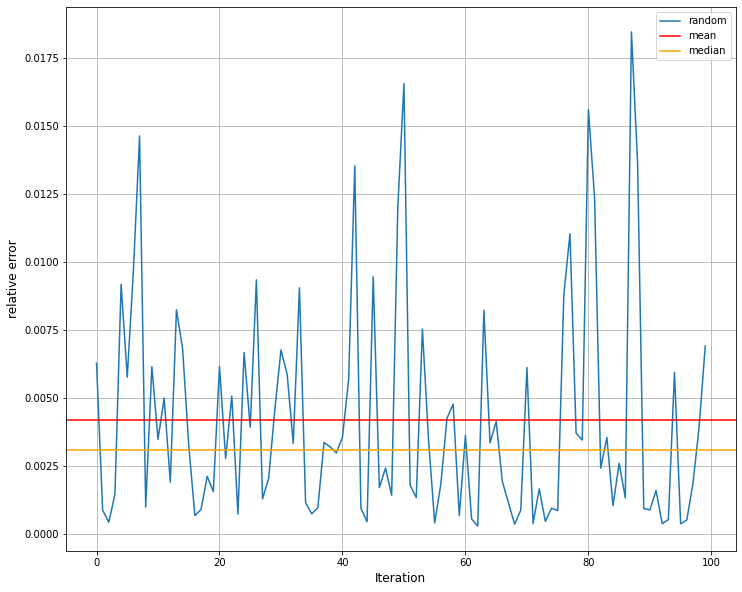

In [59]:
plt.figure(figsize=(12,10))
plt.plot(rel_erros,label='random')
plt.axhline(np.mean(rel_erros),c='red',label='mean')
plt.axhline(np.median(rel_erros),c='orange',label='median')
plt.title('',fontsize=15)
plt.ylabel('relative error',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.grid()
plt.show()

As you should know from the lecture, if $A$ is of rank $r$ and $\hat{A} = A(\mathcal{I} , \mathcal{J})$ is nonsingular, then the exact equality holds. In the approximate case, however, the quality of the approximation depends on the volume of the submatrix $\hat{A}$: 

**Theorem**

*If $\hat{A} = A_{max}$ has maximal in modulus determinant among all $r \times r$ submatrices of $A$, the following error etimate holds:*

$$ \|A - A_r\|_1 \leq (r+1)\sigma_{r+1}.$$


And the question is how to choose a good submatrix of nearly maximal volume in practice.

**Definition**: *We call $r \times r$ submatrix $A_{dom}$ of rectangular $n \times r$ matrix $A$ of
full rank dominant, if all the entries of $AA_{dom}^{-1}$ are not greater than $1$ in
modulus.*

The crucial theoretical result behind the scene is that the volume of any dominant submatrix $A_{dom}$ can not be very much smaller than the maximum volume submatrix $A_{max}$ (without proof).

We provide the following algorithm for constructing dominant submatrix of a tall matrix.

**Algorithm 1**: 
    
Given matrix $A$ of size $n \times r$ finds dominant submatrix of size $r \times r$

__step 0.__ Start with arbitrary nonsingular $r \times r$ submatrix $A_{dom}$. Reorder rows in $A$ so that $A_{dom}$ occupies first $r$ rows in $A$.

__step 1.__ Compute $B = AA_{dom}^{-1}$ and find its maximum in module  entry $b_{ij}$.

__step 2.__ **If $|b_{ij}| > 1 + \delta$, then**:

Swap rows $i$ and $j$ in $B$ (accrodignly in A). By swapping the rows we have increased the volume of the upper submatrix in $B$, as well as in $A$ (why?). Let $A_{dom}$ be the new upper submatrix of $A$ and go to __step 1__.

**elseif $|b_{ij}| < 1 + \delta$**:

return $A_{dom}$.

Note: $\delta = 10^{-2}$ seems to be a good practical choice.

- (10 pts) Implement algorithm 1 according to the following signature, where the function returns ```row_indices``` array which can be used as ```A[row_indices, :]``` to extract selected submatrix.

Note that matrix inverse $A_{dom}^{-1}$ in step 3 has to be updated efficiently using [Shermann-Morison formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) (inverse of rank-1 update).

In [60]:
delta = 1e-2

In [61]:
def dominant_submatrix_search(A,with_eff_inv=False):
    n,r = A.shape
    assert r<n, 'Transpose your matrix'
    
    A0 = A.copy()
    # 0 Get arbitrary nonsingular matrixs
    A_dom = np.zeros((r, r))
    while np.linalg.det(A_dom) == 0:
        row  =  np.random.randint(0, n, r) 
        A_dom = A[row].copy()
    # 0 Reorder rows
    A = np.delete(A, row,axis=0)
    A = np.vstack((A_dom,A))
    
    A_dom_inv = np.linalg.inv(A_dom)
    
    while True:
        #step1
        B = A@A_dom_inv
        inds = np.unravel_index(np.argmax(np.abs(B)), B.shape)
        #step2
        if np.abs(B).max() > (1.0 + delta):
            A[[inds]] = A[[inds[1], inds[0]]]
            A_dom = A[:r]
           
            if with_eff_inv: #http://www.math.hkbu.edu.hk/ICM/pdf/08-10.pdf
                u = np.zeros(r)
                u[inds[1]] = 1 
                if inds[0] <r:
                    u[inds[0]] = -1
                v = A[inds[0],:] - A[inds[1],:]
                A_dom_inv -= np.dot(A_dom_inv,np.outer(u, v),A_dom_inv) / (1+np.dot(v,A_dom_inv,u))
            else:
                A_dom_inv = np.linalg.inv(A_dom)
        else:
            break
    
    row_indices = []
    for row in A_dom:
        row_indices.append(np.where((A0==row).all(axis=1))[0][0])
    return row_indices

In [62]:
# check the convergence of your implementation on random data
A = np.random.rand(5000, 10)

row_indices = dominant_submatrix_search(A)
A_dom = A[row_indices].copy()
print('Check:', np.abs(A@np.linalg.inv(A_dom)).max(), '<',str(1+delta))

Check: 1.0000000000000002 < 1.01


- (10 pts) Propose the method to construct Skeleton approximation using Algorithm 1. The signature of the function is provided below.  Compare your algorithm with previously considered random selection on the matrix $A$.

Hint: 

1) start with random selection of columns 

2) if you transpose the matrix for which you find rows, then Algorithm 1 will give you update for columns in the initial matrix

In [63]:
def skeleton(A, r):
    N = A.shape[0]
    AA = A.copy()
    rand_cols =  np.random.randint(0, N, r)
    
    row_indices = dominant_submatrix_search(A[:,rand_cols])
        
    
    column_indices =  dominant_submatrix_search(AA.T[:,row_indices])    
    
    return row_indices, column_indices

In [64]:
A = np.exp(-np.sqrt(xv**2+yv**2))
M = 100
r=5 
rel_erros_new = []
for i in tqdm(range(M)):
    row_indices, column_indices = skeleton(A,r)
    if (type(row_indices) == str) or (type(column_indices) == str):
        print('INNER submatrix in the intersection of rows and columns is singular')
        continue
    A_inv = A[row_indices,:][:,column_indices]
    if np.linalg.det(A_inv) == 0:
        print('submatrix in the intersection of rows and columns is singular')
        continue
    A_inv = np.linalg.inv(A_inv)
    
    A_r = A[:,column_indices]@A_inv@A[row_indices,:]
    res = relative_error(A,A_r)
    rel_erros_new.append(res)

100%|██████████| 100/100 [00:38<00:00,  2.59it/s]


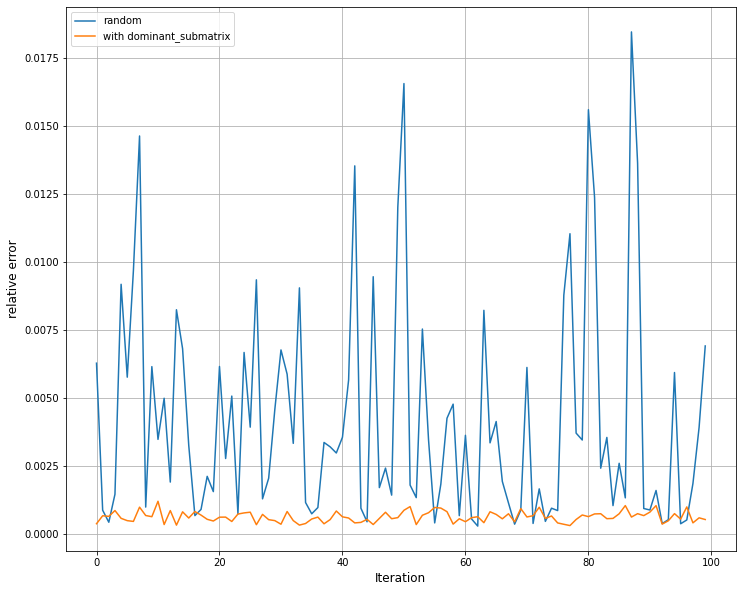

In [65]:
plt.figure(figsize=(12,10))
plt.plot(rel_erros,label='random')
plt.plot(rel_erros_new,label='with dominant_submatrix')
plt.title('',fontsize=15)
plt.ylabel('relative error',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.grid()
plt.show()

 Below you can see the comparison of my algorithm with previously considered random selection on the matrix $A$. It is shown that my algorithms is more stable. 

- (3 pts) Compare your ```skeleton``` approximation algorithm with SVD and discuss its pros and cons.

In [66]:
# check the convergence of your implementation on random data
A = np.exp(-np.sqrt(xv**2+yv**2))

In [67]:
u, s, vh = np.linalg.svd(A)

u = u[:,:r]
s = s[:r]
vh = vh[:r]

A_r = u@np.diag(s)@vh
res_svd = relative_error(A,A_r)

In [69]:
row_indices, column_indices = skeleton(A,r)
A_inv = np.linalg.inv(A[row_indices,:][:,column_indices])
A_r = A[:,column_indices]@A_inv@A[row_indices,:]
res_sklt = relative_error(A,A_r)

In [70]:
res_svd, res_sklt

(0.00011942511411381744, 0.0011477338151760067)

__Conclusion:__ Skeleton is much faster in comparison with SVD and less computationally expensive. However, SVD is more stable bacause in Skeleton we make random initialization. The result provided by SVD is more precise.